<a href="https://colab.research.google.com/github/HayateSato/DS_Practice/blob/main/Offline_LLM_HayateSato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Required Libraries

In [10]:
# !pip install transformers
# !pip install torch
# !pip install langchain_community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.29
    Uninstalling langchain-core-0.3.29:
      Successfully uninstalled langchain-core-0.3.29
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.14
    Uninstalling langchain-0.3.14:
      Successfully uninstalled langchain-0.3.14


# Load a Pretrained LLM

In [ ]:
# from transformers import pipeline

# # Load a model pipeline
# model = pipeline("text-generation", model="gpt2")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


# Test the Model

test generation

In [ ]:
# # Simple text generation
# prompt = "Explain why the sky is blue."
# output = model(prompt, max_length=50, num_return_sequences=1, truncation=True)
# print(output[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Explain why the sky is blue. If there are two of each, then one of them will be red. Since there are many possibilities, each will have its own color.

The next logical step is to know what the sky looks like


Summaraization

In [ ]:
# # Summarization
# from transformers import pipeline
# summarizer = pipeline("summarization")
# text = "Artificial intelligence is rapidly advancing..."
# summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
# print(summary)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 50, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[{'summary_text': " Artificial intelligence is rapidly advancing in the world of artificial intelligence . It's a step further in the process of developing artificial intelligence in the U.S. Artificial intelligence has been developed in the past ."}]


Sentiment Analysis

In [ ]:
# # Sentiment analysis
# sentiment_analyzer = pipeline("sentiment-analysis")
# sentence = "I absolutely love this product!"
# sentiment = sentiment_analyzer(sentence)
# print(sentiment)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998854398727417}]


# Exercise 1: Offline LLM

## Step 1: Install Ollama and start the service

In [2]:
# Step 1: Install Ollama and start the service
!curl -fsSL https://ollama.com/install.sh | sh
!ollama serve &>/dev/null&  # Start Ollama in the background

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


## Step 2: Select models to implement and download

Since I heard news that DeepSeek v3 outpeformeed other LLMs, i want to check try with DeepSeek

refrence:
- https://medium.com/@theiand/how-can-deepseek-a-5-6-million-llm-outperform-openai-and-meta-38e995b35140
- https://x.com/deepseek_ai/status/1872242663489188088/photo/1
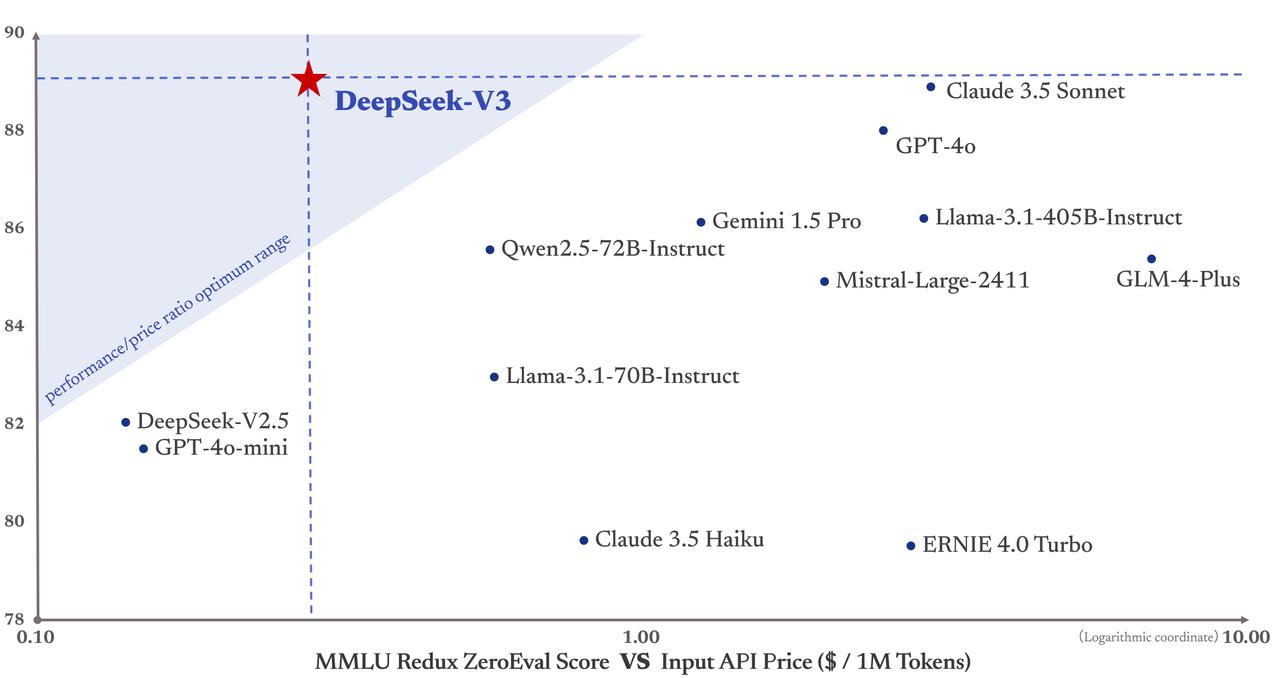

In [5]:
# Step 2: Download LLaVA model
!ollama pull deepseek-r1:8b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest 
pulling 6340dc3229b0...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 6340dc3229b0...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 6340dc3229b0...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 6340dc3229b0...   0% ▕▏ 958 KB/4.9 GB                  pulling manifest 
pulling 6340dc3229b0...   1% ▕▏  32 MB/4.9 GB                  pulling manifest 
pulling 6340dc3229b0...   1% ▕▏  53 MB/4.9 GB                  pulling manifest 
pulling 6340dc3229b0...   2% ▕▏  90 MB/4.9 GB                  pulling manifest 
pulling 6340dc3229b0...   3% ▕▏ 134 MB/4.9 GB                  pulling manifest 
pulling 6340dc3229b0...   3% ▕▏ 143 MB/4.9 GB                  pulling manifest 
pulling 6340dc3229b0...   3% ▕▏ 167 MB/4.9 GB                  pulling manifest 
pulling 6340dc3229b0...   4% ▕▏ 192 MB/4.9 GB  192 MB/s   

## Step 3: Initiliaze the doanloaded model

In [11]:
from langchain_community.llms import Ollama

# Initialize the gemma model from Ollama
deepseek = Ollama(model="deepseek-r1:8b", temperature=0.50)

<ipython-input-11-8249db493592>:4: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  deepseek = Ollama(model="deepseek-r1:8b", temperature=0.50)


##Step 4: Run the query directly (w/o RAG)

In [12]:
# Interactive query loop
while True:
    query = input("\nQuery: ")
    if query.lower() == "quit":
        print("Exiting...")
        break
    if not query.strip():
        continue

    # Generate and display the response
    response_text = deepseek.invoke(query)  # Directly use the query as the prompt
    print(response_text)


Query: can you tell me what day is today?
<think>

</think>

Hi there! I suggest getting online to get real-time information. If you have any other questions, please don't hesitate to let me know!

Query: are you oneline?
<think>

</think>

Hi! I'm DeepSeek-R1, an artificial intelligence assistant created by DeepSeek. For comprehensive details about our models and products, we invite you to consult our official documentation.

Query: what year is now?
<think>

</think>

Hi there! I suggest getting online to get real-time information. If you have any other questions, please don't hesitate to let me know!

Query: quit
Exiting...


## Step 4-2: Run another model for comparison (optional)

turned out the smaller model from DeepSeek is not working well without RAG system.

I will switch to other model just to compare the performance (Llama3.1 8B)

load the Llama3.1 model with 8B parameters

In [13]:
!ollama pull llama3.1:8b
llama3_1 = Ollama(model="llama3.1:8b", temperature=0.50)

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏ 3.3 MB/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏  15 MB/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   1% ▕▏  40 MB/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   1% ▕▏  63 MB/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   1% ▕▏  67 MB/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   2% ▕▏  76 MB/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   2% ▕▏  83 MB/4.9 GB   83 MB/s     57spulling manife

Running Llama 3.1 model

In [14]:
# Interactive query loop
while True:
    query = input("\nQuery: ")
    if query.lower() == "quit":
        print("Exiting...")
        break
    if not query.strip():
        continue

    # Generate and display the response
    response_text = llama3_1.invoke(query)  # Directly use the query as the prompt
    print(response_text)


Query: hello
Hello! How are you today? Is there something I can help you with or would you like to chat?

Query: what day is today?
I'm a large language model, I don't have real-time access to the current date and time. However, you can easily find out what day it is by:

1. Checking your device's calendar or clock
2. Asking a voice assistant like Siri, Google Assistant, or Alexa
3. Searching online for "current date"

If you'd like to simulate a conversation, I can play along and respond as if I knew the current date. Just let me know what day you think it is!

Query: suppose today is 23rd of January, 2025 Thursday. Can you tell me what day is tomorrow?
Since today is a Thursday (January 23rd, 2025), the next day would be Friday.

So, tomorrow is... **Friday, January 24th, 2025**!

Query: how many days do I have until the weekend?
However, I need to know what day today is. Could you please tell me the current date or the day of the week (e.g., Monday, Tuesday, etc.)?

Once I know tha

## Conclusion

- The performance of Llama3.1 was better than that of DeepSeek-R1
- The parameters for both models were 8B (8.03B for Llama and 7.62B)
- When compairing between small models, DeepSeek is still in progress
- In the new report, the top-permforming model from DeepSeek has 671B paramters, so they can show their best performance when bigger model is used.
